In [2]:
!pip install category_encoders
!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 KB 30.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 23.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=591ec333f12d16a30330771e418e8005445e3fe6ad8518dae51aa54ccf2241e4
  Stored in directory: /root/.cache/pip/whee

In [3]:
!pip3 install xgboost==1.7.2
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 MB 2.2 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.5 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK

import time

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/section2_project.csv')
df.head()

,Price,Brand,Model,Years_after_produced,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Num_options,Num_cylinders,newcar_avgprice_by_brand
0,6075.0,Audi,100,27,148000,174,2771,Gasoline,Front wheels,Manual,sedan,5,red,0,6,44777
1,2427.3,Audi,100,30,195000,101,2000,Gasoline,Front wheels,Manual,sedan,4,green,0,4,44777
2,2146.5,Audi,100,28,187450,116,1984,Gasoline + LPG,Front wheels,Manual,sedan,4,red,10,4,44777
3,1620.0,Audi,100,28,200000,115,2460,Diesel,Front wheels,Manual,station_wagon,4,burgundy,6,6,44777
4,1566.0,Audi,80,29,178000,116,1984,Gasoline,Front wheels,Manual,sedan,4,black,4,4,44777


# 0. 타겟(Price) 불균형 - log 변환



<Figure size 864x432 with 0 Axes>

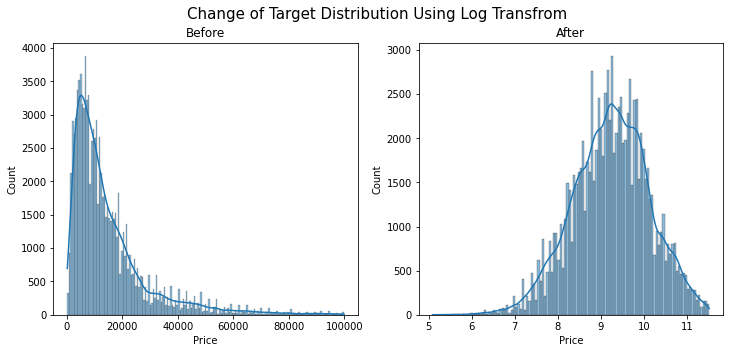

In [66]:
plt.figure(figsize = (12, 6))

target = 'Price'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Change of Target Distribution Using Log Transfrom', fontsize = 15)
sns.histplot(df[target], ax=ax[0], kde = True)
ax[0].set_title('Before')
sns.histplot(np.log1p(df[target]), ax=ax[1], kde = True)
ax[1].set_title('After')
plt.show()

In [9]:
target = 'Price'
features = df.drop(target, axis = 1).columns

train, test = train_test_split(df, train_size = 0.8, random_state = 42)
train, val = train_test_split(train, train_size = 0.8, random_state = 42)

In [10]:
train.shape, val.shape, test.shape

((63740, 16), (15936, 16), (19919, 16))

In [11]:
def x_y_split (df):
  X = df[features]
  y = df[target]

  return X, y

X_train, y_train = x_y_split(train)
X_val, y_val = x_y_split(val)
X_test, y_test = x_y_split(test)

In [12]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((63740, 15), (63740,), (15936, 15), (15936,), (19919, 15), (19919,))

# 1. 모델링

In [13]:
def eval (y, y_pred):
  r2 = r2_score(y, y_pred).round(2)
  mae = mean_absolute_error(y, y_pred).round(2)

  return r2, mae

### 1. 기준 모델 설정

In [14]:
baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
baseline_mse = mean_squared_error(y_train, baseline)
baseline_rmse = mean_squared_error(y_train, baseline, squared = False)

print(f'기준모델의 r2_score : {baseline_r2.round(2)}')
print(f'기준모델의 MAE : {baseline_mae.round(2)}')



기준모델의 r2_score : 0.0
기준모델의 MAE : 9877.16


### 2. 모델 선택

In [15]:
from sklearn.preprocessing import RobustScaler

##### 2.1 결정 트리

In [16]:
df.dtypes

Price                       float64
Brand                        object
Model                        object
Years_after_produced          int64
Mileage_km                    int64
Power_HP                      int64
Displacement_cm3              int64
Fuel_type                    object
Drive                        object
Transmission                 object
Type                         object
Doors_number                  int64
Colour                       object
Num_options                   int64
Num_cylinders                 int64
newcar_avgprice_by_brand      int64
dtype: object

In [17]:
df = df.astype({'Mileage_km' : 'float', 'Doors_number' : 'float',
                             'Power_HP' : 'float', 'Displacement_cm3' : 'float'})

In [18]:
start = time.time()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index

pipe_dt = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeRegressor(random_state = 42, 
                          criterion = 'squared_error',
                          max_depth = 8,
                          min_samples_split = 5,
                          )
)
pipe_dt.fit(X_train, y_train)

y_train_pred = pipe_dt.predict(X_train)
y_val_pred = pipe_dt.predict(X_val)

print("Time: {:.2f}sec".format((time.time() - start)))

Time: 0.88sec


In [19]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.88, 2842.74)
(0.86, 3019.25)


##### 2.2 RandomForest

In [20]:
start = time.time()

pipe_rf = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(random_state = 42,
                          criterion = 'squared_error',
                          max_depth = 9,
                          min_samples_split = 5,
                          min_samples_leaf = 5)
)
pipe_rf.fit(X_train, y_train)

y_train_pred = pipe_rf.predict(X_train)
y_val_pred = pipe_rf.predict(X_val)

print("Time: {:.2f}sec".format((time.time() - start)))

Time: 19.92sec


In [21]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.91, 2418.19)
(0.89, 2640.62)


##### 2.3 gradient boost(XGBregressor)

In [22]:
start = time.time()
pipe_gb = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBRegressor(random_state = 42,
                 n_estimators = 100,
                 max_depth = 5,
                 learning_rate = 0.1,
                 min_child_weight = 50
            
                 )
)
pipe_gb.fit(X_train, y_train)

y_train_pred = pipe_gb.predict(X_train)
y_val_pred = pipe_gb.predict(X_val)
print("Time: {:.2f}sec".format((time.time() - start)))

Time: 8.06sec


In [23]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.92, 2254.37)
(0.9, 2406.54)


##### 2.4 gradient boost(CatboostRegressor)

In [24]:
start = time.time()

pipe_cb = make_pipeline(
    OrdinalEncoder(),
    CatBoostRegressor(random_state = 42,
                 n_estimators = 100,
                 depth = 7,
                 learning_rate = 0.1,
                       
                 )
)
pipe_cb.fit(X_train, y_train)

y_train_pred = pipe_cb.predict(X_train)
y_val_pred = pipe_cb.predict(X_val)

print("Time: {:.2f}sec".format((time.time() - start)))

0:	learn: 13108.6486918	total: 68.1ms	remaining: 6.75s
1:	learn: 12140.3225221	total: 110ms	remaining: 5.41s
2:	learn: 11284.6318928	total: 132ms	remaining: 4.27s
3:	learn: 10559.9240507	total: 145ms	remaining: 3.49s
4:	learn: 9907.8440885	total: 159ms	remaining: 3.02s
5:	learn: 9315.1579030	total: 171ms	remaining: 2.69s
6:	learn: 8785.4943513	total: 188ms	remaining: 2.49s
7:	learn: 8321.1182959	total: 201ms	remaining: 2.31s
8:	learn: 7908.7243040	total: 223ms	remaining: 2.26s
9:	learn: 7541.8096724	total: 238ms	remaining: 2.15s
10:	learn: 7208.6079761	total: 251ms	remaining: 2.03s
11:	learn: 6909.3080598	total: 266ms	remaining: 1.95s
12:	learn: 6661.1733374	total: 284ms	remaining: 1.9s
13:	learn: 6447.3996331	total: 297ms	remaining: 1.83s
14:	learn: 6260.7963056	total: 311ms	remaining: 1.76s
15:	learn: 6092.3425065	total: 326ms	remaining: 1.71s
16:	learn: 5940.4403471	total: 339ms	remaining: 1.65s
17:	learn: 5796.0606370	total: 351ms	remaining: 1.6s
18:	learn: 5680.1710605	total: 366m

In [25]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.91, 2365.44)
(0.9, 2486.48)


In [26]:
model = {'0' : ['Decision_Tree', 'Train', 0.86, 2987.49, 2.38],
         '1' : ['Decision_Tree', 'Val', 0.84, 3112.7, 2.38],
         '2' : ['RandomForest', 'Train', 0.89, 2541.35, 20.89],
         '3' : ['RandomForest', 'Val', 0.87, 2732.06, 20.89],
         '4' : ['XGBregressor', 'Train', 0.91, 2298.46, 8.48],
         '5' : ['XGBregressor', 'Val', 0.89, 2419.45, 8.48],
         '6' : ['CatboostRegressor', 'Train', 0.9, 2415.56, 3.63],
         '7' : ['CatboostRegressor', 'Val', 0.89, 2504.69, 3.63],
         }

model_data = pd.DataFrame(model)
model_data.index = ['Model', 'set', 'R2_score', 'MAE', 'Time']
model_data = model_data.T
model_data

,Model,set,R2_score,MAE,Time
0,Decision_Tree,Train,0.86,2987.49,2.38
1,Decision_Tree,Val,0.84,3112.7,2.38
2,RandomForest,Train,0.89,2541.35,20.89
3,RandomForest,Val,0.87,2732.06,20.89
4,XGBregressor,Train,0.91,2298.46,8.48
5,XGBregressor,Val,0.89,2419.45,8.48
6,CatboostRegressor,Train,0.9,2415.56,3.63
7,CatboostRegressor,Val,0.89,2504.69,3.63


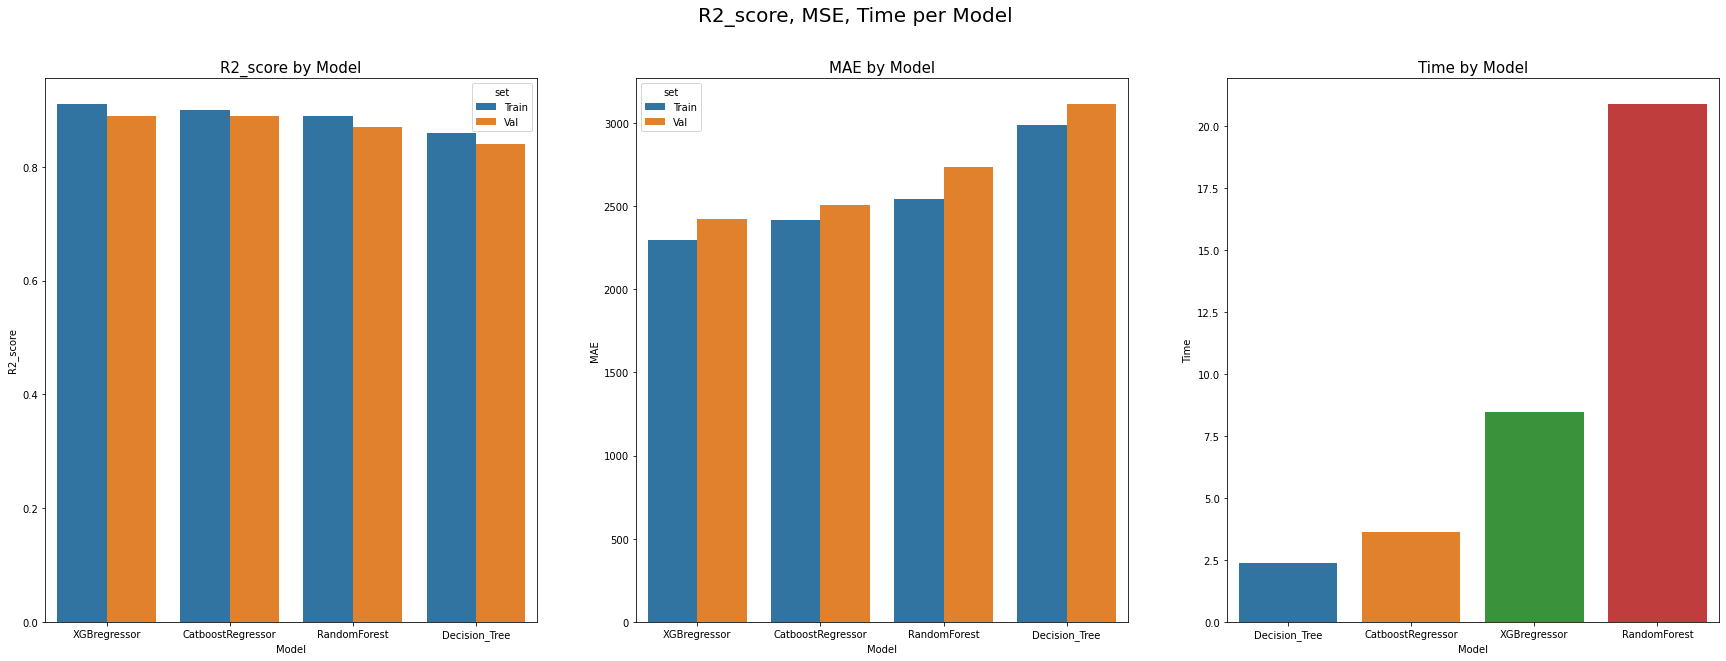

In [27]:
plt.figure(figsize = (30, 10))
plt.suptitle('R2_score, MSE, Time per Model', size = 20)
ax1 = plt.subplot(1, 3, 1)
sns.barplot(data = model_data.sort_values(by = 'R2_score', ascending = False),
            x = 'Model', y = 'R2_score', hue = 'set')
ax1.set_title('R2_score by Model', size = 15)

ax2 = plt.subplot(1, 3, 2)
sns.barplot(data = model_data.sort_values(by = 'MAE'),
            x = 'Model', y = 'MAE', hue = 'set')
ax2.set_title('MAE by Model', size = 15)

ax3 = plt.subplot(1, 3, 3)
sns.barplot(data = model_data.sort_values(by = 'Time'),
            x = 'Model', y = 'Time')
ax3.set_title('Time by Model', size = 15)

plt.show()

### 3. 하이퍼 파라미터 튜닝 (Catboost)

##### 1. GridsearchCV

In [28]:
pipe_cb = make_pipeline(
    OrdinalEncoder(),
    SelectKBest(score_func=f_regression),
    CatBoostRegressor(random_state = 42,
                 iterations = 100,
                 depth = 7,
                 learning_rate = 0.1,
                       
                 )
)

params = {'selectkbest__k' : [5, 10, 15],
          'catboostregressor__depth' : [3, 5, 7],
          'catboostregressor__learning_rate' : [0.1, 0.2],
          'catboostregressor__subsample' : [0.6, 0.8],
          'catboostregressor__l2_leaf_reg' : [3, 5, 7],

              }

grid_search = GridSearchCV(pipe_cb, param_grid=params, scoring="r2", cv=3, verbose=3, error_score="raise")

grid_search.fit(X_train, y_train)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
49:	learn: 4556.7817199	total: 412ms	remaining: 412ms
50:	learn: 4552.3260569	total: 427ms	remaining: 411ms
51:	learn: 4543.2320473	total: 435ms	remaining: 401ms
52:	learn: 4527.8021648	total: 442ms	remaining: 392ms
53:	learn: 4512.4049127	total: 449ms	remaining: 383ms
54:	learn: 4506.2239266	total: 456ms	remaining: 373ms
55:	learn: 4497.4899475	total: 463ms	remaining: 364ms
56:	learn: 4492.9153890	total: 470ms	remaining: 355ms
57:	learn: 4482.4007544	total: 478ms	remaining: 346ms
58:	learn: 4475.4379104	total: 485ms	remaining: 337ms
59:	learn: 4464.8459587	total: 493ms	remaining: 329ms
60:	learn: 4453.0805165	total: 500ms	remaining: 320ms
61:	learn: 4444.4440645	total: 508ms	remaining: 311ms
62:	learn: 4439.5685540	total: 515ms	remaining: 302ms
63:	learn: 4423.8373052	total: 523ms	remaining: 294ms
64:	learn: 4415.7940131	total: 531ms	remaining: 286ms
65:	learn: 4409.1869739	total: 538ms	remaining: 277ms
66:	learn: 4399.3309665	total: 545ms	remaining

GridSearchCV(cv=3, error_score='raise',
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f85233c71f0>)),
                                       ('catboostregressor',
                                        <catboost.core.CatBoostRegressor object at 0x7f8506dc5f70>)]),
             param_grid={'catboostregressor__depth': [3, 5, 7],
                         'catboostregressor__l2_leaf_reg': [3, 5, 7],
                         'catboostregressor__learning_rate': [0.1, 0.2],
                         'catboostregressor__subsample': [0.6, 0.8],
                         'selectkbest__k': [5, 10, 15]},
             scoring='r2', verbose=3)

In [29]:
y_train_pred = grid_search.predict(X_train)
y_val_pred = grid_search.predict(X_val)

In [30]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.93, 2165.27)
(0.91, 2329.3)


##### 2. RandomizedSearchCV

In [31]:
pipe_cb = make_pipeline(
    OrdinalEncoder(),
    SelectKBest(score_func=f_regression),
    CatBoostRegressor(random_state = 42,
                 iterations = 100,
                 depth = 7,
                 learning_rate = 0.1,
                       
                 )
)

params = {'selectkbest__k' : list(range(1, 16)),
          'catboostregressor__iterations' : [100, 200, 300],
          'catboostregressor__depth' : [3,5,7],
          'catboostregressor__learning_rate' : [0.05, 0.1, 0.15, 0.2],
          'catboostregressor__subsample' : [0.6, 0.8, 1],
          'catboostregressor__l2_leaf_reg' : [3, 5, 7],
              }

randomized_search = RandomizedSearchCV(
    pipe_cb,
    param_distributions=params,
    scoring="r2",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)

In [32]:
randomized_search.fit(X_train, y_train)

y_train_pred = randomized_search.predict(X_train)
y_val_pred = randomized_search.predict(X_val)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
124:	learn: 5935.9024354	total: 571ms	remaining: 799ms
125:	learn: 5935.2269551	total: 576ms	remaining: 796ms
126:	learn: 5929.7787583	total: 581ms	remaining: 791ms
127:	learn: 5927.9323923	total: 584ms	remaining: 785ms
128:	learn: 5927.1731003	total: 589ms	remaining: 781ms
129:	learn: 5923.2871689	total: 597ms	remaining: 781ms
130:	learn: 5922.4657272	total: 601ms	remaining: 776ms
131:	learn: 5921.0556126	total: 605ms	remaining: 769ms
132:	learn: 5920.6062323	total: 607ms	remaining: 763ms
133:	learn: 5920.1833668	total: 611ms	remaining: 757ms
134:	learn: 5917.2062691	total: 615ms	remaining: 751ms
135:	learn: 5912.3906937	total: 619ms	remaining: 746ms
136:	learn: 5908.6053395	total: 623ms	remaining: 741ms
137:	learn: 5907.8176473	total: 627ms	remaining: 736ms
138:	learn: 5903.9747733	total: 631ms	remaining: 730ms
139:	learn: 5902.1878927	total: 634ms	remaining: 725ms
140:	learn: 5899.7946345	total: 638ms	remaining: 719ms
141:	learn: 5897.8217103	tota

In [33]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.9, 2485.18)
(0.89, 2634.53)


##### 3. Bayesian Search

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
from hyperopt import hp

params = {
    'selectkbest__k' : hp.quniform('k', 1, 15, 1),
    'catboostregressor__iterations' : hp.quniform('iterations', 100, 300, 50),
    'catboostregressor__depth' : hp.quniform('depth', 2, 10, 1),
    'catboostregressor__learning_rate' : hp.uniform('learning_rate', 0.05, 0.2),
    'catboostregressor__subsample' : hp.uniform('subsample', 0.6, 1),
    'catboostregressor__l2_leaf_reg' : hp.quniform('l2_leaf_reg', 2, 10, 1),
}

In [36]:
pipe_cb = make_pipeline(
    OrdinalEncoder(),
    SelectKBest(score_func=f_regression),
    CatBoostRegressor(random_state = 42,
                 iterations = 100,
                 depth = 7,
                 learning_rate = 0.1,
                       
                 )
)

def fit_and_eval(params):
    score = cross_val_score(pipe_cb, X_train, y_train, cv=3, scoring="r2")
    avg_cv_score = np.mean(score)
    return {"loss": avg_cv_score, "status": STATUS_OK}

trials = (
    Trials()
)  # Trials() 객체를 fmin에 함께 넣어 실행하면, 실행되는 매 fit의 학습 정보 및 학습 결과가 해당 객체에 모두 저장됩니다.

best_params = fmin(
    fn=fit_and_eval, trials=trials, space=params, algo=tpe.suggest, max_evals=10,
    rstate = np.random.RandomState(42)
)  # max_evals 횟수만큼 하이퍼파라미터 조합을 탐색합니다.

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]0:	learn: 13118.6490579	total: 25.5ms	remaining: 2.52s
1:	learn: 12154.1759001	total: 53.8ms	remaining: 2.64s
2:	learn: 11300.3376602	total: 76.7ms	remaining: 2.48s
3:	learn: 10559.1307647	total: 85.9ms	remaining: 2.06s
4:	learn: 9889.8966157	total: 94.6ms	remaining: 1.8s
5:	learn: 9301.6258114	total: 103ms	remaining: 1.61s
6:	learn: 8791.2007152	total: 112ms	remaining: 1.48s
7:	learn: 8322.0396842	total: 120ms	remaining: 1.38s
8:	learn: 7925.0675915	total: 129ms	remaining: 1.3s
9:	learn: 7563.3277675	total: 138ms	remaining: 1.24s
10:	learn: 7245.3996535	total: 147ms	remaining: 1.19s
11:	learn: 6973.8224244	total: 156ms	remaining: 1.14s
12:	learn: 6737.7326405	total: 165ms	remaining: 1.1s
13:	learn: 6526.5227664	total: 173ms	remaining: 1.06s
14:	learn: 6345.6924648	total: 181ms	remaining: 1.03s
15:	learn: 6188.6574412	total: 190ms	remaining: 998ms
16:	learn: 6050.3899205	total: 199ms	remaining: 972ms
17:	learn: 5938.6543907	total: 208

In [37]:
print("최적 하이퍼파라미터: ", trials.best_trial["misc"]["vals"])
print("최적 r2: ", trials.best_trial["result"]["loss"])

최적 하이퍼파라미터:  {'depth': [4.0], 'iterations': [200.0], 'k': [5.0], 'l2_leaf_reg': [3.0], 'learning_rate': [0.17489480484724398], 'subsample': [0.7818804208885488]}
최적 r2:  0.8874120202142123


In [38]:
best_pipe = make_pipeline(
        OrdinalEncoder(),
        SelectKBest(score_func = f_regression, k = int(best_params['k'])),
        CatBoostRegressor(
            random_state=42,
            iterations = best_params['iterations'],
            depth = int(best_params['depth']),
            subsample = best_params['subsample'],
            learning_rate=best_params['learning_rate'],
            l2_leaf_reg = best_params['l2_leaf_reg'],
        ),
    )

best_pipe.fit(X_train, y_train)

y_train_pred = best_pipe.predict(X_train)
y_val_pred = best_pipe.predict(X_val)

0:	learn: 12588.9204512	total: 20.8ms	remaining: 4.14s
1:	learn: 11302.1915437	total: 42.7ms	remaining: 4.22s
2:	learn: 10218.1751587	total: 54.1ms	remaining: 3.55s
3:	learn: 9385.4227812	total: 68.3ms	remaining: 3.35s
4:	learn: 8701.3459310	total: 85.3ms	remaining: 3.33s
5:	learn: 8141.3015979	total: 102ms	remaining: 3.3s
6:	learn: 7670.3002685	total: 118ms	remaining: 3.27s
7:	learn: 7306.6376472	total: 138ms	remaining: 3.31s
8:	learn: 7032.9681010	total: 155ms	remaining: 3.29s
9:	learn: 6799.9769509	total: 167ms	remaining: 3.17s
10:	learn: 6611.0808623	total: 174ms	remaining: 2.99s
11:	learn: 6480.7754390	total: 180ms	remaining: 2.83s
12:	learn: 6375.1435800	total: 188ms	remaining: 2.71s
13:	learn: 6287.3297951	total: 199ms	remaining: 2.65s
14:	learn: 6212.9128788	total: 220ms	remaining: 2.71s
15:	learn: 6143.4475077	total: 227ms	remaining: 2.61s
16:	learn: 6098.0655760	total: 234ms	remaining: 2.52s
17:	learn: 6062.8234248	total: 240ms	remaining: 2.43s
18:	learn: 6032.6200020	total: 

In [39]:
print(eval(y_train, y_train_pred))
print(eval(y_val, y_val_pred))

(0.86, 2973.7)
(0.85, 3074.32)


In [40]:
tuning = {'0' : ['GridSearchCV', 'Train', 0.91, 2206.4],
         '1' : ['GridSearchCV', 'Val', 0.9, 2335.15],
         '2' : ['RandomizedSearchCV', 'Train', 0.89, 2534.74],
         '3' : ['RandomizedSearchCV', 'Val', 0.88, 2643.4],
         '4' : ['BayesianSearch', 'Train', 0.85, 3014.54],
         '5' : ['BayesianSearch', 'Val', 0.84, 3096.7],
         }

tuning = pd.DataFrame(tuning)
tuning.index = ['Model', 'set', 'R2_score', 'MAE']
tuning = tuning.T
tuning

,Model,set,R2_score,MAE
0,GridSearchCV,Train,0.91,2206.4
1,GridSearchCV,Val,0.9,2335.15
2,RandomizedSearchCV,Train,0.89,2534.74
3,RandomizedSearchCV,Val,0.88,2643.4
4,BayesianSearch,Train,0.85,3014.54
5,BayesianSearch,Val,0.84,3096.7


Text(0.5, 1.0, 'MAE by Model')

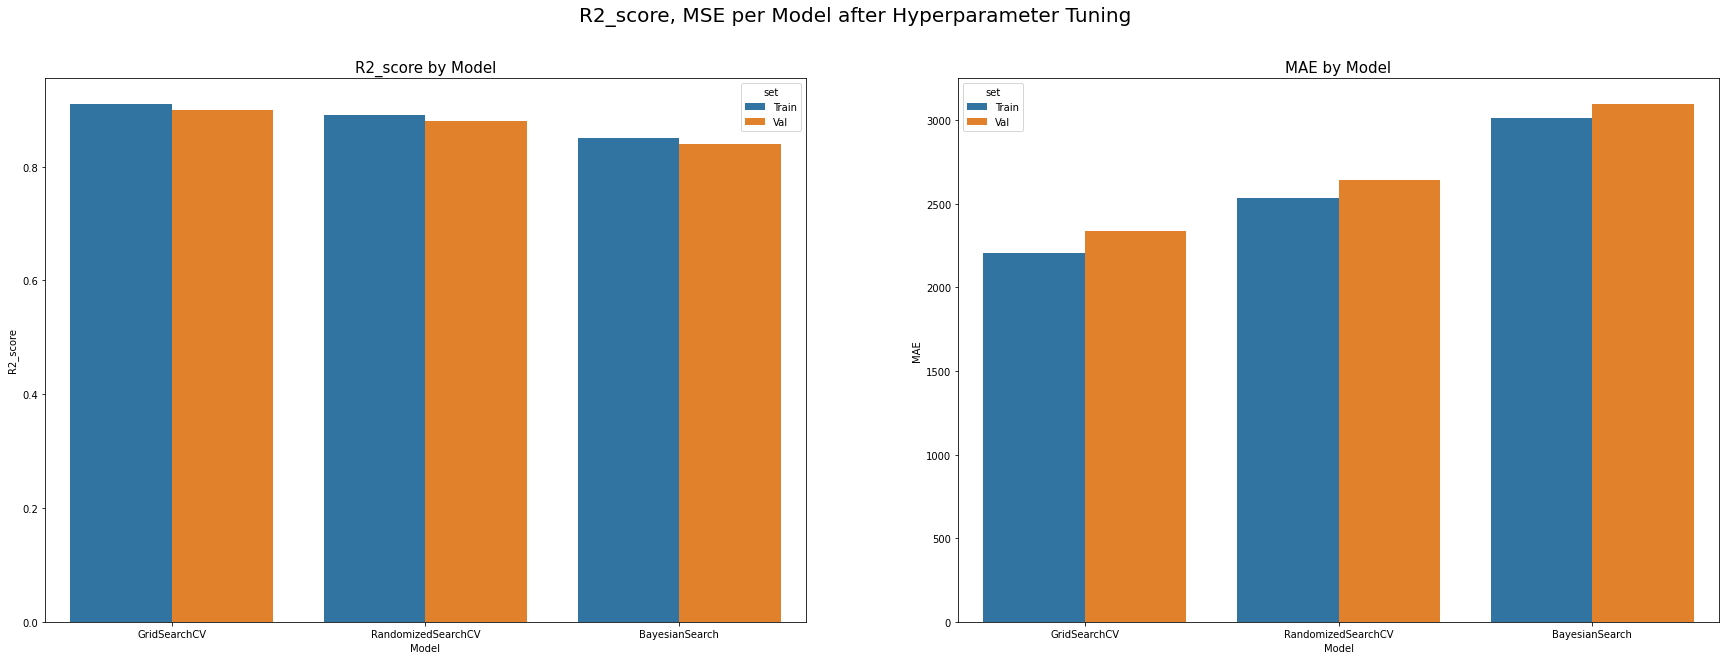

In [67]:
plt.figure(figsize = (30, 10))
plt.suptitle('R2_score, MSE per Model after Hyperparameter Tuning', size = 20)
ax1 = plt.subplot(1, 2, 1)
sns.barplot(data = tuning.sort_values(by = 'R2_score', ascending = False),
            x = 'Model', y = 'R2_score', hue = 'set')
ax1.set_title('R2_score by Model', size = 15)

ax2 = plt.subplot(1, 2, 2)
sns.barplot(data = tuning.sort_values(by = 'MAE'),
            x = 'Model', y = 'MAE', hue = 'set')
ax2.set_title('MAE by Model', size = 15)

In [42]:
y_test_pred = grid_search.predict(X_test)

eval(y_test, y_test_pred)

(0.92, 2259.82)

# 3. 모델 해석

### 1. Feature importance (MDI)

In [43]:
best_params = grid_search.best_params_
best_params

{'catboostregressor__depth': 7,
 'catboostregressor__l2_leaf_reg': 3,
 'catboostregressor__learning_rate': 0.2,
 'catboostregressor__subsample': 0.8,
 'selectkbest__k': 15}

In [44]:
best_pipe = make_pipeline(
        OrdinalEncoder(),
        SelectKBest(score_func = f_regression, k = 15),
        CatBoostRegressor(
            random_state=42,
            
            depth = 7,
            subsample = 0.8,
            learning_rate=0.2,
            l2_leaf_reg = 3,
        ),
    )

best_pipe.fit(X_train, y_train)

0:	learn: 12055.8963874	total: 24.7ms	remaining: 24.7s
1:	learn: 10451.3370699	total: 39.2ms	remaining: 19.6s
2:	learn: 9150.6102346	total: 52.3ms	remaining: 17.4s
3:	learn: 8151.8210148	total: 65.3ms	remaining: 16.3s
4:	learn: 7415.3550499	total: 78.4ms	remaining: 15.6s
5:	learn: 6815.8251468	total: 91.6ms	remaining: 15.2s
6:	learn: 6348.9346680	total: 105ms	remaining: 14.9s
7:	learn: 6002.5900876	total: 119ms	remaining: 14.8s
8:	learn: 5714.6213822	total: 132ms	remaining: 14.6s
9:	learn: 5496.7190499	total: 146ms	remaining: 14.4s
10:	learn: 5329.9885032	total: 159ms	remaining: 14.3s
11:	learn: 5207.2987979	total: 171ms	remaining: 14.1s
12:	learn: 5096.2757683	total: 185ms	remaining: 14s
13:	learn: 5016.2230913	total: 198ms	remaining: 14s
14:	learn: 4952.9857755	total: 212ms	remaining: 13.9s
15:	learn: 4904.2945865	total: 227ms	remaining: 13.9s
16:	learn: 4839.0659096	total: 252ms	remaining: 14.5s
17:	learn: 4801.6829473	total: 264ms	remaining: 14.4s
18:	learn: 4766.4117868	total: 275

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Brand', 'Model', 'Fuel_type', 'Drive',
                                      'Transmission', 'Type', 'Colour'],
                                mapping=[{'col': 'Brand',
                                          'data_type': dtype('O'),
                                          'mapping': Audi              1
Ford              2
Mercedes-Benz     3
BMW               4
Peugeot           5
Nissan            6
Kia               7
Renault           8
Toyota            9
Volvo            10
Škoda            11
Hyundai          12
Volkswagen       13
Opel             14
Citroën          15
NaN              -2
dtype: int64},
                                         {'col': 'Model',
                                          'data_type': dtype('O'),
                                          'm...
convertible      7
NaN             -2
dtype: int64},
                                         {'col': 'Colour',
                

In [45]:
print(pipe_cb)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7f85233c71f0>)),
                ('catboostregressor',
                 <catboost.core.CatBoostRegressor object at 0x7f8505fc1f40>)])


In [46]:
list(X_train.columns)

['Brand',
 'Model',
 'Years_after_produced',
 'Mileage_km',
 'Power_HP',
 'Displacement_cm3',
 'Fuel_type',
 'Drive',
 'Transmission',
 'Type',
 'Doors_number',
 'Colour',
 'Num_options',
 'Num_cylinders',
 'newcar_avgprice_by_brand']

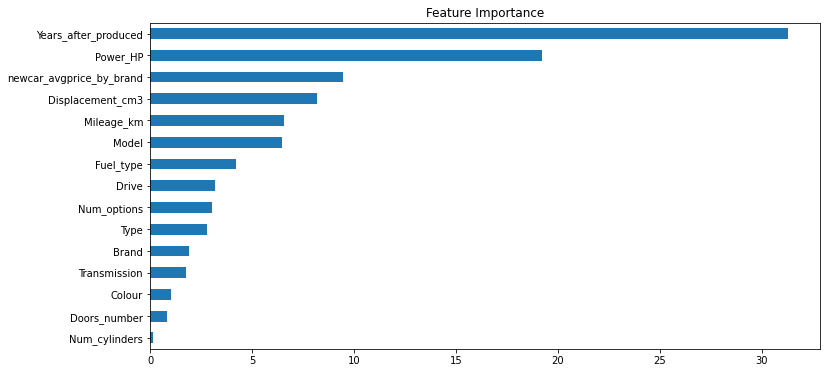

Text(0.5, 1.0, 'Cardinailty')

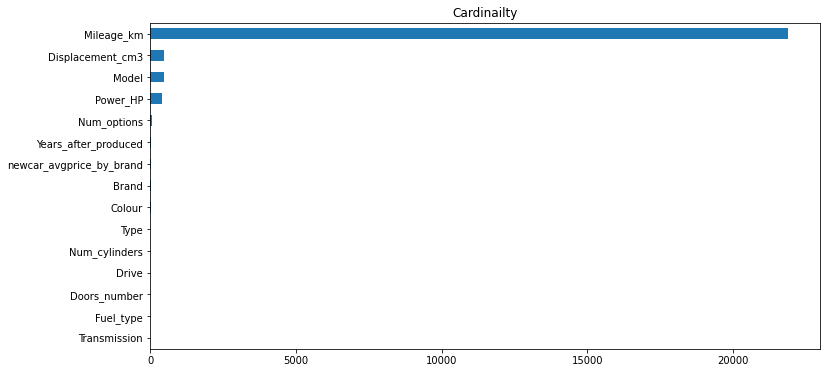

In [62]:
cb = best_pipe.named_steps['catboostregressor']
importances = pd.Series(cb.feature_importances_, X_train.columns)

importances
plt.figure(figsize = (12, 6))
importances.sort_values().plot.barh()
plt.title("Feature Importance")
plt.show()

plt.figure(figsize = (12, 6))
X_train.nunique().sort_values().plot.barh()
plt.title("Cardinailty")



In [48]:
!pip3 install eli5
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 16.2 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=2d1b14493119ad7cb045f62c6966a90bdf1ae79cfd5c63ddc3b7f9800ea19e8e
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [49]:
!pip3 install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=a3174063874c8d2b63e54ac400ed9213604ab059c5059e5b3e9dca9596f66891
  Stored in directory: /root/.cache/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-linux_x86_64.whl size=12090267 sha256=81f1a67d32f823e7520bcdc2f3078131652e840b255a11fba3df4a80ead38511
  Stored in directory: /root/.cache/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=

### 2. Permutation Importance

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    best_pipe.named_steps["catboostregressor"],  # model
    scoring="r2",  # metric
    n_iter=10,  # 다른 random seed를 사용하여 10번 반복
    random_state=42,
)

# 스코어를 다시 계산합니다.
X_val_preprocessed = best_pipe[0].transform(X_val)
permuter.fit(X_val_preprocessed, y_val)

PermutationImportance(estimator=<catboost.core.CatBoostRegressor object at 0x7f8505ecd9a0>,
                      n_iter=10, random_state=42, scoring='r2')

Text(0.5, 1.0, 'Permutation Importance')

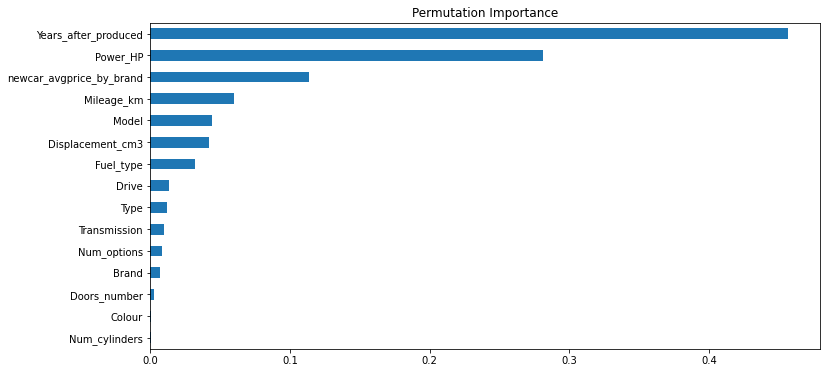

In [63]:
feature_names = X_val.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
plt.figure(figsize = (12, 6))
pi.plot.barh()

plt.title("Permutation Importance")

In [68]:
eli5.show_weights(
    permuter,
    top=None,  # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names,  # list 형식으로 넣어야 합니다
)

Weight,Feature
0.4566 ± 0.0151,Years_after_produced
0.2814 ± 0.0078,Power_HP
0.1135 ± 0.0065,newcar_avgprice_by_brand
0.0603 ± 0.0031,Mileage_km
0.0439 ± 0.0029,Model
0.0424 ± 0.0020,Displacement_cm3
0.0317 ± 0.0050,Fuel_type
0.0133 ± 0.0015,Drive
0.0117 ± 0.0015,Type
0.0100 ± 0.0007,Transmission


### 3. PDP


In [52]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [53]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

cb = CatBoostRegressor(
            random_state=42,
            
            depth = 7,
            subsample = 0.8,
            learning_rate=0.2,
            l2_leaf_reg = 3,
        )
eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

cb.fit(X_train_encoded, y_train, eval_set=eval_set, early_stopping_rounds=50)



0:	learn: 12055.8963874	test: 12055.8963874	test1: 12130.6046253	best: 12130.6046253 (0)	total: 15.8ms	remaining: 15.8s
1:	learn: 10451.3370699	test: 10451.3370699	test1: 10530.6061647	best: 10530.6061647 (1)	total: 31ms	remaining: 15.5s
2:	learn: 9150.6102346	test: 9150.6102346	test1: 9218.1725159	best: 9218.1725159 (2)	total: 45.1ms	remaining: 15s
3:	learn: 8151.8210148	test: 8151.8210148	test1: 8227.4795318	best: 8227.4795318 (3)	total: 59.9ms	remaining: 14.9s
4:	learn: 7415.3550499	test: 7415.3550499	test1: 7508.4080103	best: 7508.4080103 (4)	total: 73.9ms	remaining: 14.7s
5:	learn: 6815.8251468	test: 6815.8251468	test1: 6933.8564261	best: 6933.8564261 (5)	total: 87.8ms	remaining: 14.5s
6:	learn: 6348.9346680	test: 6348.9346680	test1: 6470.9075838	best: 6470.9075838 (6)	total: 102ms	remaining: 14.4s
7:	learn: 6002.5900876	test: 6002.5900876	test1: 6137.9045835	best: 6137.9045835 (7)	total: 117ms	remaining: 14.5s
8:	learn: 5714.6213822	test: 5714.6213822	test1: 5870.0760911	best: 58

In [54]:
def pdp (feature):
  isolated = pdp_isolate(
    model=cb,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10,  # default = 10
)
  pdp_plot(isolated, feature_name=feature, plot_lines = True, frac_to_plot= 50, plot_pts_dist = True)


def cat_pdp (feature):
  mappings = encoder.mapping
  mapping_data = list(filter(lambda x: x['col'] == feature, mappings))
  maps = mapping_data[0]["mapping"]

  isolated = pdp_isolate(
    model=cb,
    dataset=X_val_encoded,
    model_features=X_val.columns,
    feature=feature,
    grid_type="percentile",  # default = 'percentile', or 'equal'
    num_grid_points=10, # default = 10
    cust_grid_points=list(range(len(maps)))
)
  
  encoded_features = maps.values.tolist()
  original_features = maps.index.tolist()

  pdp_plot(isolated, feature_name=feature, plot_lines = True, frac_to_plot= 30)
  plt.xticks(encoded_features, original_features, rotation=90)

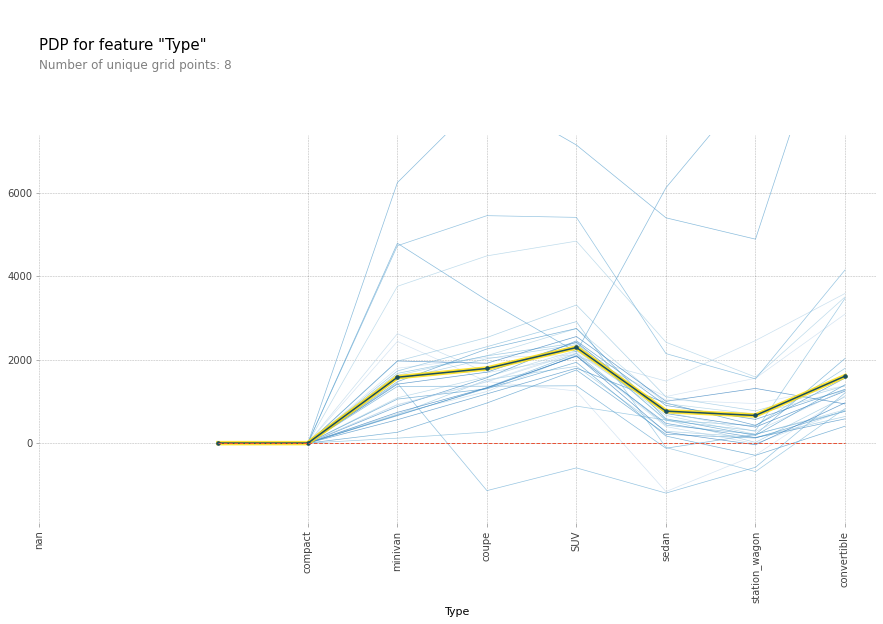

In [55]:
cat_pdp('Type')

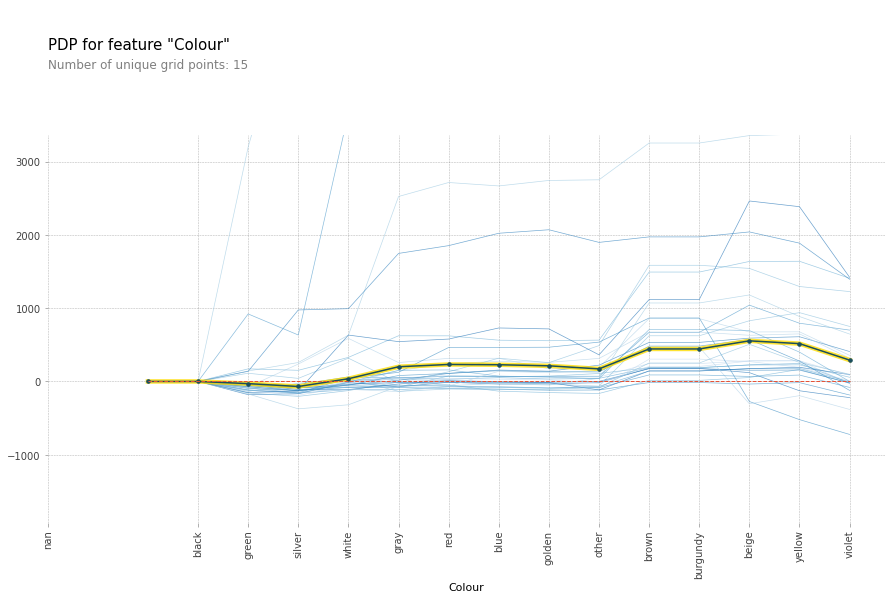

In [56]:
cat_pdp('Colour')

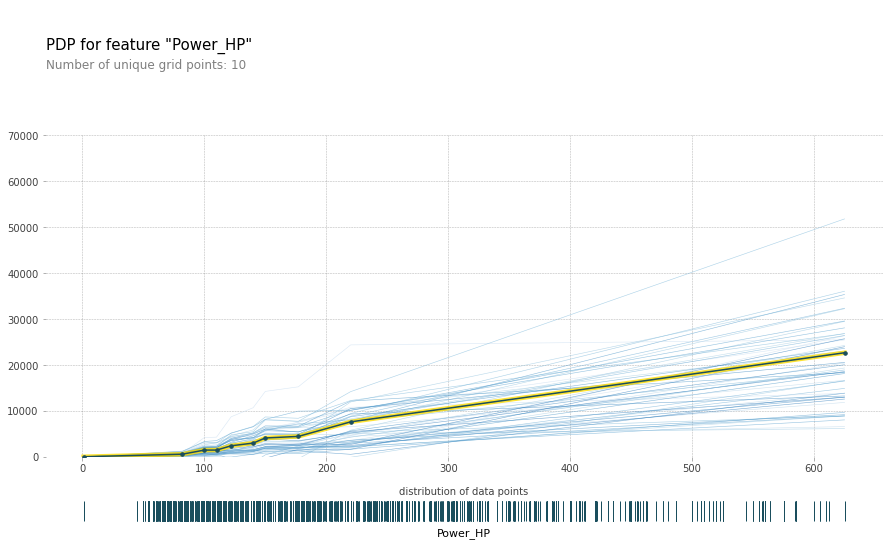

In [57]:
pdp('Power_HP')

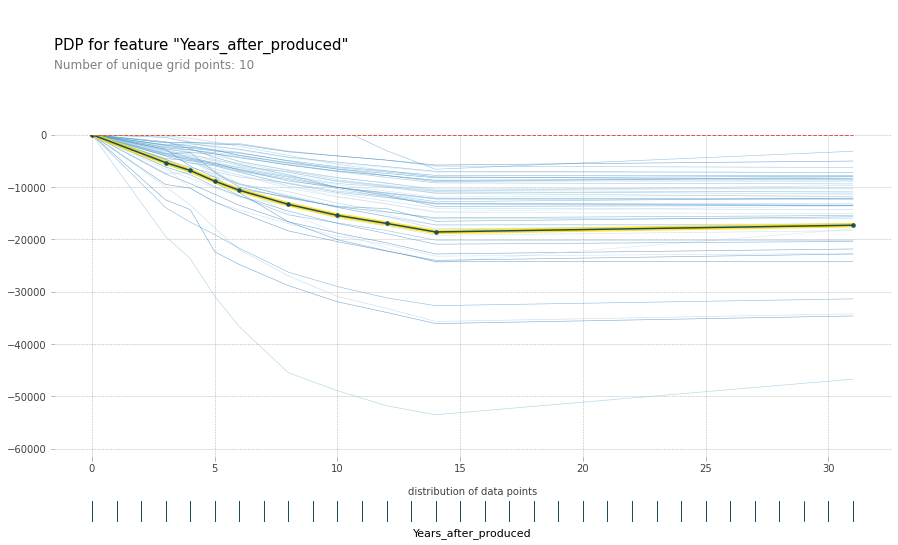

In [58]:
pdp('Years_after_produced')

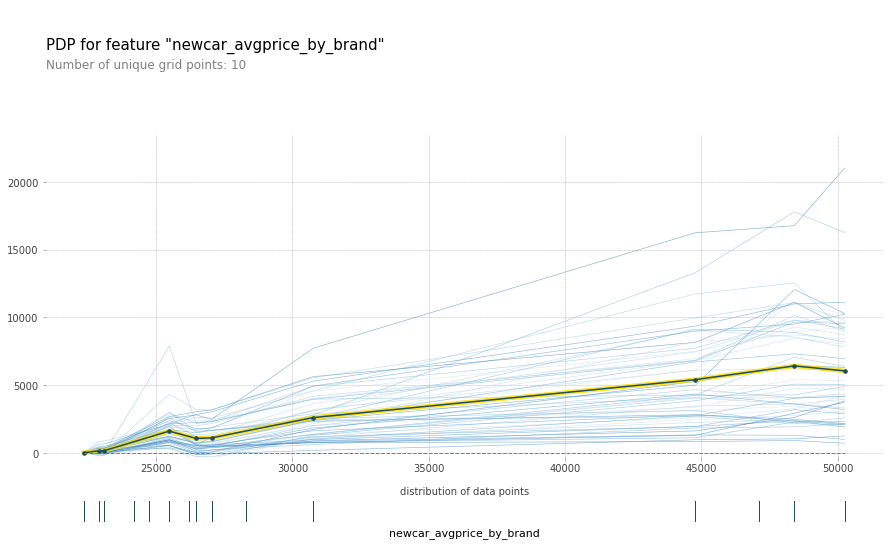

In [59]:
pdp('newcar_avgprice_by_brand')